In [18]:
import numpy as np
import matplotlib # for exporting graphs
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow import keras
from TrainingDataGeneratorV3 import training_data_generator

In [4]:
train_data, test_data, time_steps, space_steps = training_data_generator(
    num_samples=15, # FOR A TRAIN/TEST SPLIT OF 0.2 5 IS THE MIN FOR 1 TEST SAMPLE
    num_potentials=5,
    test_set_rnd_seed=0)

Building training data, 15 samples:
>>> Generating random initial wavefunctions
>>> Success 0.011510610580444336
>>> Generating random potentials
(5, 1024)
>>> Success 0.002918720245361328
>>> Solving pseudo-spectral ODE...
    0 of 15, Batch time: 3.337860107421875e-06
    10 of 15, Batch time: 67.40867447853088
    0 of 15, Batch time: 34.82687854766846
    10 of 15, Batch time: 70.30888867378235
    0 of 15, Batch time: 33.64380884170532
    10 of 15, Batch time: 71.38087558746338
    0 of 15, Batch time: 34.4017117023468
    10 of 15, Batch time: 77.12503361701965
    0 of 15, Batch time: 49.623126745224
    10 of 15, Batch time: 93.36009907722473
>>> Success 581.594160079956
Total elapse time: 582.3192434310913


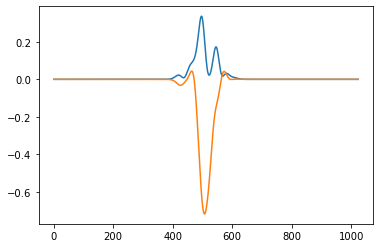

In [24]:
plt.plot(np.real(train_data['input'][0,0,0,:]))
plt.plot(np.imag(train_data['input'][0,0,0,:]))
plt.show()

In [47]:
num_space_steps = 1024
space_res = 25.6*2/1023
xvec = np.linspace(-25.6, 25.6, 1024)
dt = 5.0/499
k_res = 1/(num_space_steps * space_res)
k_steps = numpy.arange(-num_space_steps//2, num_space_steps//2) * k_res
k_terms = numpy.fft.ifftshift(2 * numpy.pi * 1j * k_steps)
psi = train_data['input'][0,0,1,:]
psi_hat = numpy.fft.fft(psi)
psi_hat_prime = k_terms**2 * psi_hat
psi_x = numpy.fft.ifft(k_terms * psi_hat)
psi_xx = numpy.fft.ifft(psi_hat_prime)

In [51]:
# centered-difference first-derivative in time
# first element of this (in the third dimension) will be the time derivative of psi at t=1*dt
psi_dot = (train_data['input'][:,:,2:,:] - train_data['input'][:,:,:-2,:]) / (2*dt)

In [76]:
baselineV = (1j*psi_dot[0,0,0,:] + 0.5*psi_xx)/psi

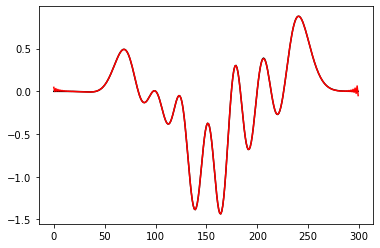

In [82]:
width = 150
myrange = np.arange(num_space_steps//2 - width,num_space_steps//2 + width,dtype=np.int64)
plt.plot(train_data['output'][0,0,0,myrange], color='black')
plt.plot(np.real(baselineV[myrange]), color='red')
plt.show()

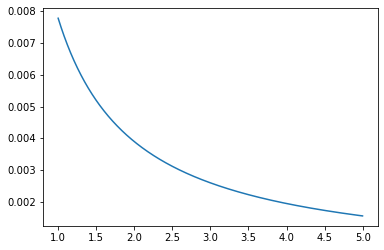

In [102]:
xx = np.linspace(1,5,1026)
plt.plot(xx[1:-1],(xx[2:]-xx[:-2])/xx[1:-1])
plt.show()

In [103]:
num_epochs = 500

# create input nodes
train_data_input = xx[1:-1]
train_data_output = (xx[2:]-xx[:-2])/xx[1:-1]
train_data_input = np.expand_dims(train_data_input, 0)
train_data_output = np.expand_dims(train_data_input, 1)
nn_input = keras.Input(shape=(1024))

# create hidden layers, connect graph nodes (construct graph structure)
nn_output = keras.layers.Dense(units=2048, activation='elu')(nn_input)
nn_output = keras.layers.Dense(units=2048, activation='elu')(nn_output)
nn_output = keras.layers.Dense(1024)(nn_output)

# create a model from the graph
nn_model = keras.Model(inputs=nn_input, outputs=nn_output)

# complile model parameters
nn_model.compile(optimizer='Adam', loss='MSE')

# fit the model
nn_hist = nn_model.fit(x=train_data_input,
                       y=train_data_output,
                       batch_size=5,
                       epochs=num_epochs,
                       verbose=1
                      )


Epoch 1/500
1/1 [==============================] - 1s 555ms/step - loss: 13.9307
Epoch 2/500
1/1 [==============================] - 0s 151ms/step - loss: 8.1930
Epoch 3/500
1/1 [==============================] - 0s 190ms/step - loss: 9.7914
Epoch 4/500
1/1 [==============================] - 0s 281ms/step - loss: 6.7086
Epoch 5/500
1/1 [==============================] - 0s 303ms/step - loss: 2.9725
Epoch 6/500
1/1 [==============================] - 0s 242ms/step - loss: 2.3100
Epoch 7/500
1/1 [==============================] - 0s 280ms/step - loss: 1.4361
Epoch 8/500
1/1 [==============================] - 0s 153ms/step - loss: 1.4341
Epoch 9/500
1/1 [==============================] - 0s 161ms/step - loss: 0.7491
Epoch 10/500
1/1 [==============================] - 0s 168ms/step - loss: 0.7399
Epoch 11/500
1/1 [==============================] - 0s 163ms/step - loss: 0.6375
Epoch 12/500
1/1 [==============================] - 0s 233ms/step - loss: 0.5489
Epoch 13/500
1/1 [==================

1/1 [==============================] - 0s 137ms/step - loss: 4.6044e-05
Epoch 101/500
1/1 [==============================] - 0s 240ms/step - loss: 4.3109e-05
Epoch 102/500
1/1 [==============================] - 0s 211ms/step - loss: 3.7896e-05
Epoch 103/500
1/1 [==============================] - 0s 92ms/step - loss: 3.7899e-05
Epoch 104/500
1/1 [==============================] - 0s 177ms/step - loss: 3.2562e-05
Epoch 105/500
1/1 [==============================] - 0s 215ms/step - loss: 3.0053e-05
Epoch 106/500
1/1 [==============================] - 0s 270ms/step - loss: 2.5196e-05
Epoch 107/500
1/1 [==============================] - 0s 250ms/step - loss: 2.3772e-05
Epoch 108/500
1/1 [==============================] - 0s 308ms/step - loss: 2.0331e-05
Epoch 109/500
1/1 [==============================] - 0s 199ms/step - loss: 1.9940e-05
Epoch 110/500
1/1 [==============================] - 0s 273ms/step - loss: 1.7413e-05
Epoch 111/500
1/1 [==============================] - 0s 222ms/step - 

1/1 [==============================] - 0s 243ms/step - loss: 2.4379e-09
Epoch 196/500
1/1 [==============================] - 0s 299ms/step - loss: 2.3788e-09
Epoch 197/500
1/1 [==============================] - 0s 301ms/step - loss: 2.2418e-09
Epoch 198/500
1/1 [==============================] - 0s 346ms/step - loss: 2.0331e-09
Epoch 199/500
1/1 [==============================] - 0s 278ms/step - loss: 1.8580e-09
Epoch 200/500
1/1 [==============================] - 0s 256ms/step - loss: 1.5063e-09
Epoch 201/500
1/1 [==============================] - 0s 169ms/step - loss: 1.3445e-09
Epoch 202/500
1/1 [==============================] - 0s 233ms/step - loss: 1.3397e-09
Epoch 203/500
1/1 [==============================] - 0s 171ms/step - loss: 1.2150e-09
Epoch 204/500
1/1 [==============================] - 0s 139ms/step - loss: 1.1040e-09
Epoch 205/500
1/1 [==============================] - 0s 192ms/step - loss: 9.3776e-10
Epoch 206/500
1/1 [==============================] - 0s 196ms/step -

KeyboardInterrupt: 

In [113]:
real_train_data = np.concatenate([np.real(train_data['input']), np.imag(train_data['input'])], axis=3)

In [123]:
num_epochs = 50

print(real_train_data.shape)
#train_data_input = train_data['input'].reshape(500, train_data['input'].shape[0]*train_data['input'].shape[1]*1024)
train_data_input = real_train_data[:,0,:10,:].reshape(real_train_data.shape[0], 10*2048)
#train_data_input = real_train_data[:,0,:10,:].reshape(real_train_data.shape[0]*real_train_data.shape[1], 10*2048)
print(train_data_input.shape)

print(train_data['output'].shape)
train_data_output = train_data['output'][:,0,0,:].reshape(train_data['output'].shape[0], 1024)
# train_data_output = train_data['output'][:,0,0,:].reshape(train_data['output'].shape[0]*train_data['output'].shape[1], 1024)
print(train_data_output.shape)

# create input nodes
nn_input = keras.Input(shape=(10*2048))

# create hidden layers, connect graph nodes (construct graph structure)
nn_output = keras.layers.Dense(units=2048, activation='elu')(nn_input)
nn_output = keras.layers.Dense(units=2048, activation='elu')(nn_output)
nn_output = keras.layers.Dense(1024)(nn_output)

# create a model from the graph
nn_model = keras.Model(inputs=nn_input, outputs=nn_output)

# complile model parameters
opt = keras.optimizers.Adam(learning_rate=0.0005)
nn_model.compile(optimizer=opt, loss='MSE')

# fit the model
nn_hist = nn_model.fit(x=train_data_input,
                       y=train_data_output,
                       batch_size=5,
                       validation_split=0.2,
                       epochs=num_epochs,
                       verbose=1
                      )

(5, 12, 500, 2048)
(5, 20480)
(5, 12, 500, 1024)
(5, 1024)
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.0739 - val_loss: 0.1401
Epoch 2/50
1/1 [==============================] - 1s 512ms/step - loss: 0.1296 - val_loss: 0.1073
Epoch 3/50
1/1 [==============================] - 1s 612ms/step - loss: 0.1010 - val_loss: 0.0678
Epoch 4/50
1/1 [==============================] - 0s 472ms/step - loss: 0.0597 - val_loss: 0.0500
Epoch 5/50
1/1 [==============================] - 1s 571ms/step - loss: 0.0411 - val_loss: 0.0395
Epoch 6/50
1/1 [==============================] - 1s 520ms/step - loss: 0.0316 - val_loss: 0.0347
Epoch 7/50
1/1 [==============================] - 1s 588ms/step - loss: 0.0272 - val_loss: 0.0323
Epoch 8/50
1/1 [==============================] - 1s 513ms/step - loss: 0.0244 - val_loss: 0.0314
Epoch 9/50
1/1 [==============================] - 0s 461ms/step - loss: 0.0230 - val_loss: 0.0302
Epoch 10/50
1/1 [==============================] - 1s 501ms/st

In [121]:
? nn_model.compile